<a href="https://colab.research.google.com/github/mlin3happy/ML-Learning/blob/main/Boston_House.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

boston_housing=pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

boston_housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
boston_housing.dropna(inplace=True)
X=boston_housing.drop(columns=['medv'])
y=boston_housing['medv']
x_train, x_test, y_train,y_test=train_test_split(X,y, test_size=0.25, random_state=42)
regressor=DecisionTreeRegressor(max_depth=2)
DT_reg=regressor.fit(x_train, y_train)
print(DT_reg.score(x_train,y_train))
print(DT_reg.score(x_test,y_test))



0.7089458256236383
0.6370379660938668


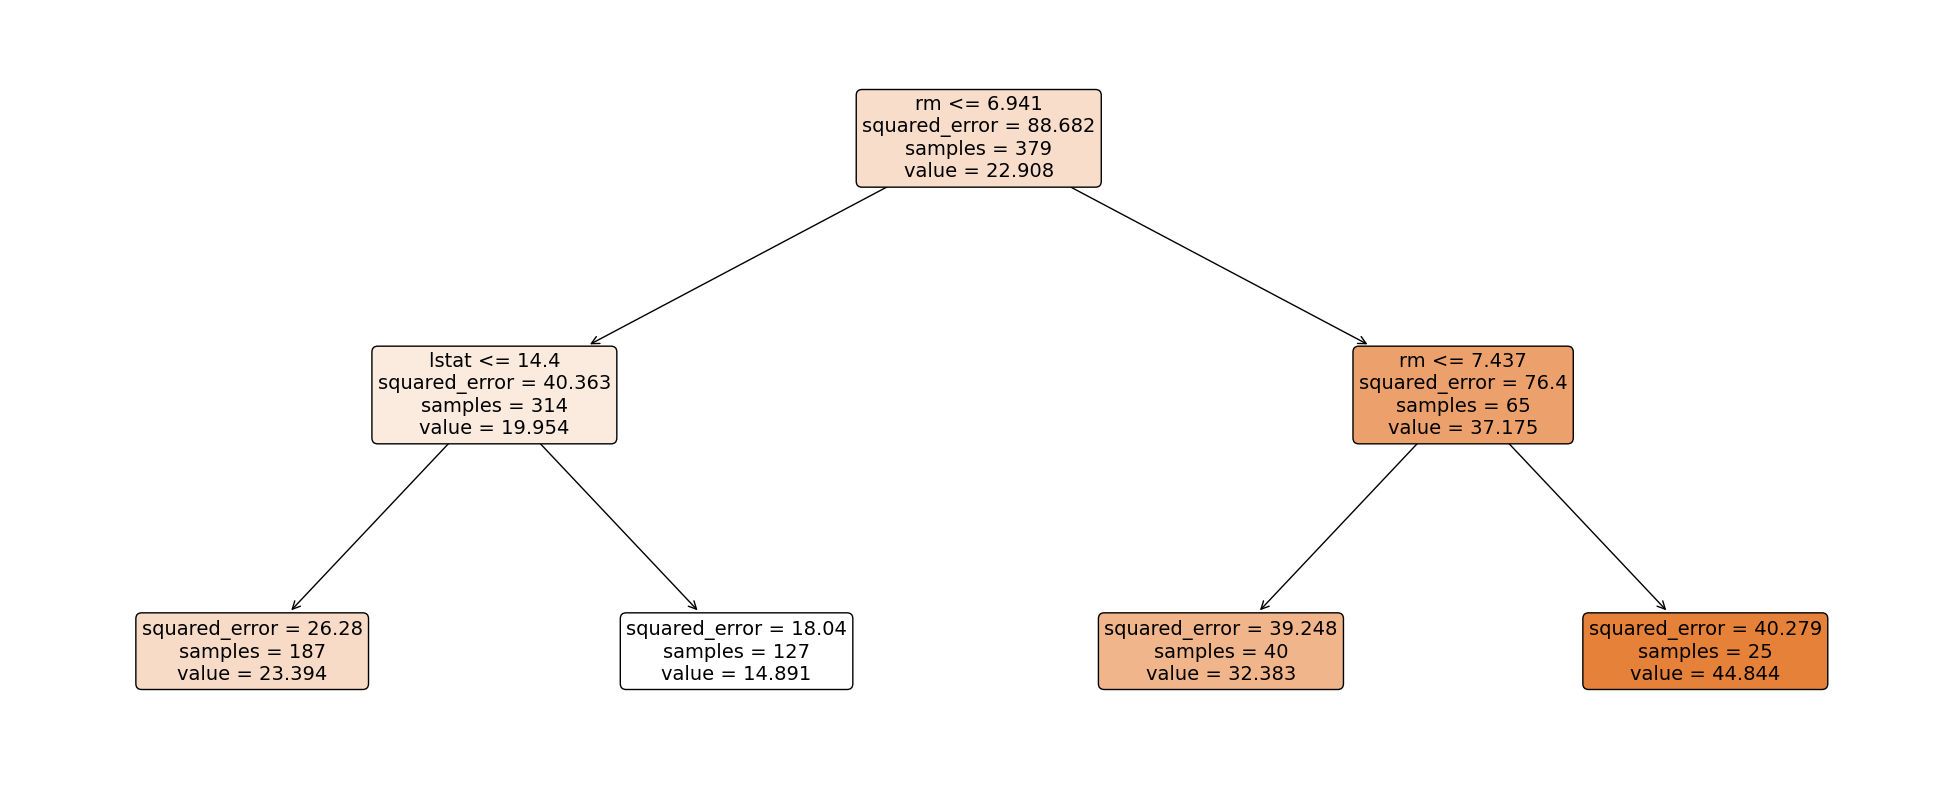

In [22]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))
a=plot_tree(regressor, feature_names=X.columns, class_names=y, filled=True, rounded=True, fontsize=14)

In [24]:
extracted_MSEs=regressor.tree_.impurity
for idx, MSE in enumerate(regressor.tree_.impurity):
  print("Node{} has MSE {}".format(idx,MSE))

Node0 has MSE 88.68173153904536
Node1 has MSE 40.36292598076943
Node2 has MSE 26.28049358002852
Node3 has MSE 18.03991071982054
Node4 has MSE 76.39970177515238
Node5 has MSE 39.24844374999975
Node6 has MSE 40.27926399999956


In [26]:
y_train_prediction=regressor.predict(x_train)
y_test_prediction=regressor.predict(x_test)

In [28]:
mean_error_train=mean_squared_error(y_train, y_train_prediction)
mean_error_test=mean_squared_error(y_test, y_test_prediction)
print("mse train", mean_error_train)
print("mse test", mean_error_test)

mse train 25.811188155362967
mse test 25.417194489397087
